In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

In [93]:
# loading the data
df = pd.read_csv('../dataset/House_Rent_Dataset.csv')
print(df.head())

    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


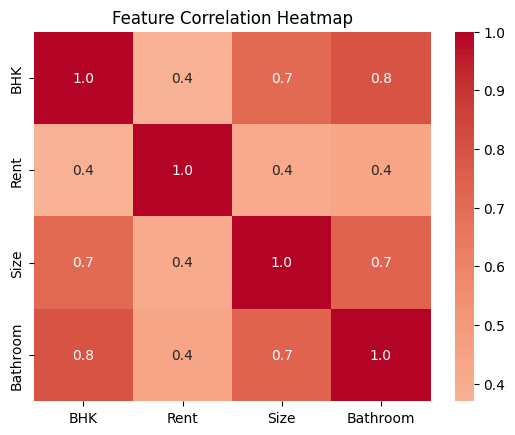

In [95]:
numeric_df = df.select_dtypes(include=['int64','float64'])

cor = numeric_df.corr()

sns.heatmap(cor, annot=True, fmt='.1f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()


In [96]:
df_encoded = pd.get_dummies(df, columns=['City'], drop_first=False)
print(df.head())


    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

In [97]:


# Clean column names (remove extra spaces, tabs, weird chars)
df.columns = df.columns.str.strip()

print("Columns found:", df.columns.tolist())


# -------------------- FLOOR PROCESSING --------------------

# Auto-detect floor column (even if name is ' floor ', 'Floor ', 'floor', etc.)
floor_cols = [col for col in df.columns if 'floor' in col.lower()]

if len(floor_cols) == 0:
    raise Exception("No matching 'Floor' column found in your dataset!")

floor_col = floor_cols[0]
print("Detected Floor column:", floor_col)


def process_floor(text):
    text = str(text).strip()

    # Handle missing floor entries
    if text == "" or text.lower() == "nan":
        return pd.Series([None, None])

    # Ground floor case
    if "Ground" in text:
        floor = 0

    # Basement
    elif "Basement" in text:
        floor = -1

    else:
        # First part = floor number
        try:
            floor = int(text.split()[0])
        except:
            floor = None

    # Last part = total floors
    try:
        total = int(text.split()[-1])
    except:
        total = None

    return pd.Series([floor, total])


df[['floor_number', 'total_floors']] = df[floor_col].apply(process_floor)
df.drop(floor_col, axis=1, inplace=True)



# -------------------- DATE PROCESSING --------------------
date_cols = [col for col in df.columns if 'posted' in col.lower() or 'date' in col.lower()]

if len(date_cols) == 0:
    raise Exception("No date column found!")

date_col = date_cols[0]
print("Detected date column:", date_col)

df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

df['posted_year'] = df[date_col].dt.year
df['posted_month'] = df[date_col].dt.month
df['posted_day'] = df[date_col].dt.day

df.drop(date_col, axis=1, inplace=True)



# -------------------- ONE-HOT ENCODING --------------------
categorical_columns = [
    'Area Type',
    'Area Locality',
    'City',
    'Furnishing Status',
    'Tenant Preferred',
    'Point of Contact'
]

# Keep only columns that actually exist in your dataset
categorical_columns = [col for col in categorical_columns if col in df.columns]

print("Categorical columns being encoded:", categorical_columns)

df_final = pd.get_dummies(df, columns=categorical_columns, drop_first=False)



# -------------------- DONE --------------------
print("\nFinal Encoded DataFrame:")
print(df_final.head())

print("\nShape Before:", df.shape)
print("Shape After:", df_final.shape)


Columns found: ['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact']
Detected Floor column: Floor
Detected date column: Posted On
Categorical columns being encoded: ['Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']

Final Encoded DataFrame:
   BHK   Rent  Size  Bathroom  floor_number  total_floors  posted_year  \
0    2  10000  1100         2           0.0           2.0         2022   
1    2  20000   800         1           1.0           3.0         2022   
2    2  17000  1000         1           1.0           3.0         2022   
3    2  10000   800         1           1.0           2.0         2022   
4    2   7500   850         1           1.0           2.0         2022   

   posted_month  posted_day  Area Type_Built Area  ...  City_Mumbai  \
0             5          18                 False  ...        False   
1             5    

In [98]:

y = df_final['Rent']
X = df_final.drop(['Rent'], axis=1)
X = X.fillna(0)


In [99]:
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [112]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---- SCALER ----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---- MODEL ----
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("Model trained successfully!")


Model trained successfully!


In [114]:
model.score(X_test_scaled, y_test)

-0.06949097996728248

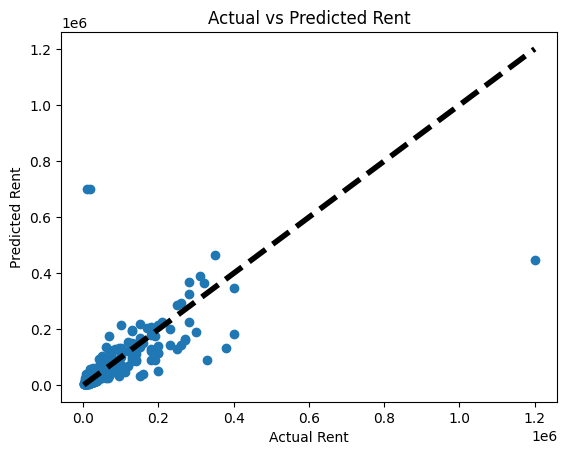

In [113]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Actual vs Predicted Rent")
plt.show()